In [1]:
#improrting the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style(style='darkgrid')

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#reading the Dataset
df = pd.read_csv('titanic.csv')

### Data Understanding

In [3]:
#checking the shape i.e no. of rows and colums in the dataframe
df.shape

(891, 12)

In [4]:
#looking at top five rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#looking at the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Preprocessing

#### Ticket and Fare are unnecessary columns. So, lets drop it

In [6]:
df1 = df.drop(['Ticket','Fare'],axis = 1)

In [7]:
#function to check the % null data in each column in the dataframe
def chk_null(df):
    print('% of NULL Data in each column:')
    return 100*(df.isnull().sum()/len(df))

In [8]:
#checking the null data in each column in titanic dataframe
chk_null(df1)

% of NULL Data in each column:


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

##### We can observe almost ```77%``` of data is NULL in ```Cabin``` column and almost ```20%``` null data in ```Age``` column while ```less than 1%``` data is null in ```Embarked column```. Let us see this Visually

In [9]:
#looking over the cabins in ship
cabins = sorted(df['Cabin'].fillna('00').apply(lambda x:x[0]).unique())[1:]
print(f'Different Cabins in the ship :{cabins}')

Different Cabins in the ship :['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']


#### From above inforamtion we can say that there is ```No data``` for the```cabins between G and T```

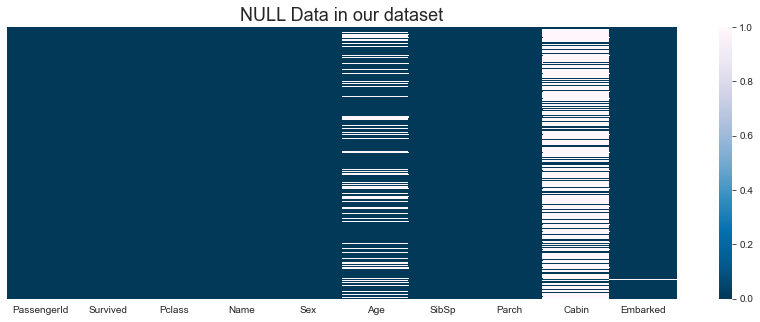

In [10]:
#visualising null data using seaborn's heatmap
plt.figure(figsize=(15,5))
plt.title('NULL Data in our dataset',fontdict={'fontsize':18})
sb.heatmap(df1.isnull(),cmap='PuBu_r',yticklabels=False)
plt.show()

#### Dropping column ```cabin``` due to high null values

In [11]:
df2 = df1.drop('Cabin',axis=1)

In [12]:
#again checking null data
chk_null(df2)

% of NULL Data in each column:


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Embarked        0.224467
dtype: float64

#### Age column also have approx 20% null data

In [13]:
#finding maximum age for children
mx_age_child = df[df['Name'].apply(lambda x:'Master' in x)].Age.max()
print(f'Max Age for children: {mx_age_child}')

Max Age for children: 12.0


In [14]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
df['Age'].median()

28.0

#### Median is Closer to Mean

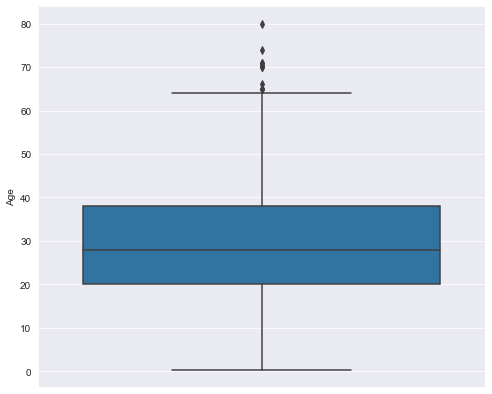

In [16]:
plt.figure(figsize=(8,7))
sb.boxplot(y=df['Age'])
plt.show()

#### There are some outliers in Age

In [17]:
#Function to impute Age column
def imputer(DF):
    df = DF.copy()
    #for children imputing age as 12
    df[df['Name'].apply(lambda x:'Master' in x)].fillna(mx_age_child,inplace=True)
    #for adults imputing age with median
    df['Age'].fillna(df['Age'].median(),inplace=True)
    return df

In [18]:
#imputing the Age column
df3 = imputer(df2)

In [19]:
#updating the Age where Age is less than 1 -> 1
#Roundig the remaining data in Age column
df3['Age'] = df3['Age'].apply(lambda x: np.ceil(x) if x<1 else round(x))

In [20]:
#Again checking the null data in Data Frame
chk_null(df3)

% of NULL Data in each column:


PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Embarked       0.224467
dtype: float64

In [21]:
#imputing the Embarked column with mode(Embarked)
df3['Embarked'].fillna(df3['Embarked'].mode()[0],inplace=True)

In [22]:
#Again checking the null data in Data Frame
chk_null(df3)

% of NULL Data in each column:


PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Embarked       0.0
dtype: float64

### Now, There is no Null data in dataset

In [23]:
zeros = round(100*len(df3[df3['Survived']==0])/len(df3),2)
ones = round(100*len(df3[df3['Survived']==1])/len(df3),2)
print(f'class_0 data: {zeros} % and class_1 data: {ones} %')

class_0 data: 61.62 % and class_1 data: 38.38 %


#### There is no Problem of class Imbalace

In [24]:
#for passengers below 12, updating value as Child in Sex column
df3.loc[df3['Age']<=12,'Sex'] = 'Child'

In [25]:
#creating column FamilyMember to store the values of both SibSp and Parch
df3['FamilyMember'] = df3['SibSp'] + df3['Parch']

In [26]:
#dropping unnecessary columns
df3.drop(['SibSp','Parch','Name'],axis=1,inplace=True)

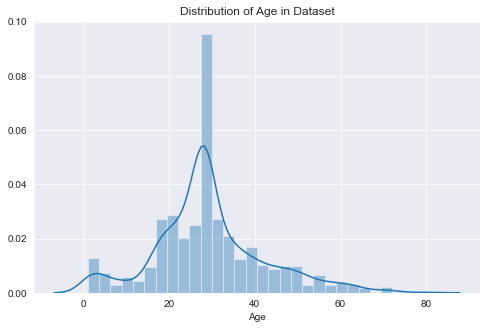

In [27]:
plt.figure(figsize=(8,5))
plt.title('Distribution of Age in Dataset')
sb.distplot(df3['Age'])
plt.show()

#### We can see the, most of the passengers were between the age 20-40

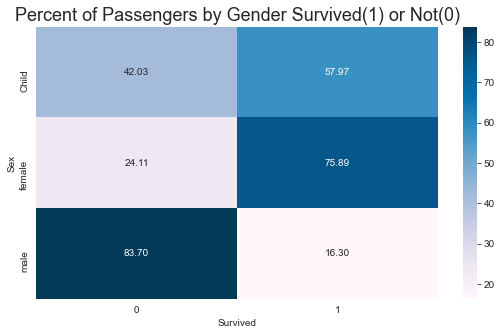

In [28]:
plt.figure(figsize=(9,5))
plt.title('Percent of Passengers by Gender Survived(1) or Not(0)',fontdict={'fontsize':18})
sb.heatmap(pd.crosstab(index=df3['Sex'],columns=df3['Survived'],normalize='index')*100,annot=True,fmt='.2f',cmap='PuBu')
plt.show()

#### Most of the Male Passengers around 83.70% could not survive while 42.03% children could not survive

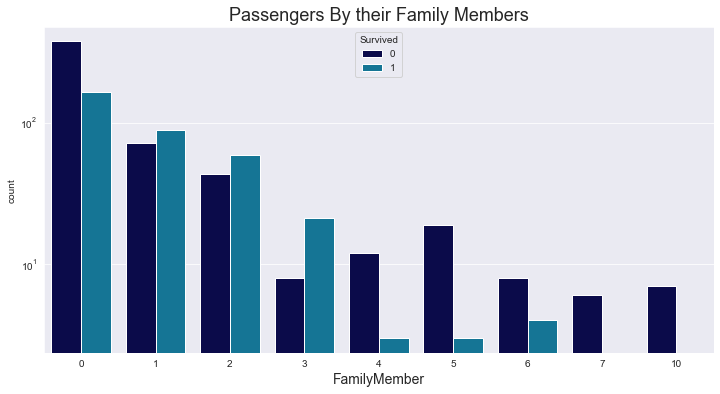

In [29]:
plt.figure(figsize=(12,6))
plt.yscale('log')
plt.title('Passengers By their Family Members',fontdict={'fontsize':18})
plt.xlabel('Family Memebers',fontdict={'fontsize':14})
sb.countplot(df3['FamilyMember'],hue=df3['Survived'],palette='ocean')
plt.show()

#### For Passengers with 1-3 Family Members the ratio to Survived and Not Survived is higher while<br> for others this ratio Not Survived to Survived is higher

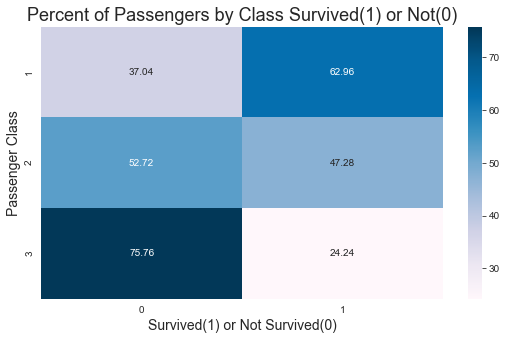

In [30]:
plt.figure(figsize=(9,5))
plt.title('Percent of Passengers by Class Survived(1) or Not(0)',fontdict={'fontsize':18})
sb.heatmap(pd.crosstab(index=df3['Pclass'],columns=df3['Survived'],normalize='index')*100,annot=True,fmt='.2f',cmap='PuBu')
plt.xlabel('Survived(1) or Not Survived(0)',fontdict={'fontsize':14})
plt.ylabel('Passenger Class',fontdict={'fontsize':14})
plt.show()

#### Majority of the Passengers of Class 2 and 3 could not survive

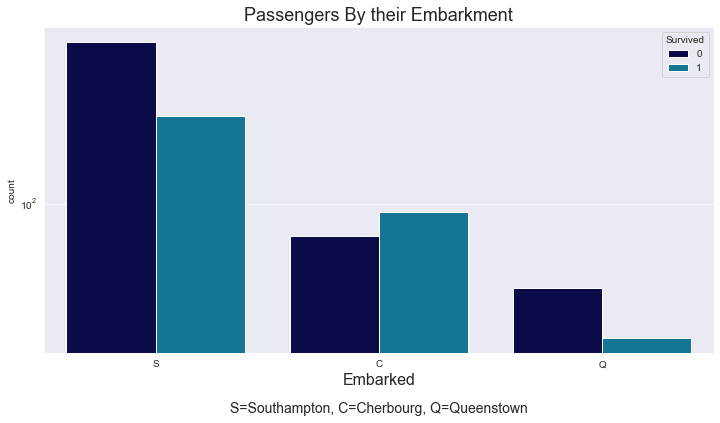

In [31]:
plt.figure(figsize=(12,6))
plt.yscale('log')
#plt.legend(('S','Q','C'),('Southampton','Queenstown','Cherbourg'),loc='upper right')
plt.xlabel('Embarked City',fontdict={'fontsize':16})
plt.title('Passengers By their Embarkment',fontdict={'fontsize':18})
sb.countplot(df3['Embarked'],hue=df3['Survived'],palette='ocean')
plt.text(1, 15,'S=Southampton, C=Cherbourg, Q=Queenstown',horizontalalignment='center'
                                                             ,verticalalignment='bottom',fontsize=14)

plt.show()

#### Ratio of Survived to Not Survived is higher only for the passengers who embarked from Cherbourg